<a href="https://colab.research.google.com/github/omkardpatil/Image_processing/blob/main/Contact_angle_measurement_ME_338_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Picture
*   Make working code with user interface
*   Make it work on phone using kivy/else

Image processing points:-
1. Get img [Done]
2. Ask to user to crop [Done yet to be tested]
3. Thresholding (option for user to changer para using sliders),(search 'user para' in this colab) [future dev]
4. Measure angle [Done]
5. Display angle [Done]
6. Check if threre are sufficient black pixels after first black pixel in given row [Not req for now, thresholding is taking care of this]

In [131]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from math import *

In [132]:
def read_img(path):
  # reading the image
  img_colored = cv2.imread(path)
  img_gray = cv2.cvtColor(img_colored, cv2.COLOR_BGR2GRAY)
  img = img_gray
  # displaying the image
  cv2_imshow(img)
  h,l = img.shape
  print('Img shape :', h,l)
  return img, img_colored

In [133]:
def click_event(event, x, y, flags, params):
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        return x,y

In [134]:
# function to crop image to focus on drop only
def crop_img(img): 
  #call this function when u want to crop
  x1 , y1 = cv2.setMouseCallback('image', click_event)
  x2 , y2 = cv2.setMouseCallback('image', click_event)
  cropped_img = img[x1:x2, y1:y2] 
  return cropped_img

In [135]:
def thresholding(img):
  thr = 125 # user para
  h,l = img.shape
  for i in range(h):
    for j in range(l):
      if(img[i,j]<thr):
        img[i,j]=0
      else:
        img[i,j]=255
  # displaying the image
  cv2_imshow(img)
  return img

In [136]:
def find_c_points(img):
  error_margin = 0.05 #user para , non white pixels
  leng = 10 #user para , to check continuity of black pixels
  thr = 255-255*error_margin
  c_points_l = [] # x,y x:all , y: first non-white pixel
  prev_j=-1
  write=True
  for i in range(h):
    for j in range(l):
      if (img[i,j]<thr):
        # if(len(c_points)!=0 and (j==prev_j)): # Do not include vertical black columns
        #  write=False
        # for o in range(leng):
        #   if img[i,j+o]<thr: # Do not include if it is random black pixel of length less then leng in row
        #     write = False
        #     break
        if(write):
          c_points_l.append([i,j])
          prev_j=j
        write=True
        break
  c_points_r = [] # x,y x:all , y: first non-white pixel
  prev_j=-1
  write=True
  for i in range(h):
    for j in range(l-1,-1,-1):
      if (img[i,j]<thr):
        # if(len(c_points)!=0 and (j==prev_j)): # Do not include vertical black columns
        #  write=False
        #for i in range(leng):
          # if img[i,j+i]<thr: # Do not include if it is random black pixel of length less then leng in row
          #   write = False
          #   break
        if(write):
          c_points_r.append([i,j])
          prev_j=j
        write=True
        break
  print('len(c_points_l) :', len(c_points_l))
  # for i in range(len(c_points_l)-6,len(c_points_l)):
  #   print(i, c_points_l[i])
  c_points_l=np.array(c_points_l)


  print('len(c_points_r) :', len(c_points_r))
  # for i in range(len(c_points_r)-6,len(c_points_r)):
  #   print(i, c_points_r[i])
  c_points_r=np.array(c_points_r)
  return c_points_l, c_points_r

Differntiation of edge point on plateform to find angle of contact


In [137]:
# plt.scatter(c_points_l[:,1],h-c_points_l[:,0])
# ax = plt.gca()
# ax.set_aspect('equal', adjustable='box')

In [138]:
# plt.scatter(c_points_r[:,1],h-c_points_r[:,0])
# ax = plt.gca()
# ax.set_aspect('equal', adjustable='box')

In [139]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

In [140]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
    
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    # function to show plot
    plt.show()

In [141]:
def find_angle_of_contact(c_points, p, is_right):
  x = np.array(c_points[-p:,1])
  y = np.array(h-c_points[-p:,0])
  # print(x,y)
  b = estimate_coef(x, y)
  slope = b[1]
  angle = degrees(atan(slope))
  if (angle<0):
    angle=angle+180
  if(is_right):
    angle = 180-angle
  return angle

In [142]:
def put_text(image, origin_for_text, text, is_right):
  text=text*100
  text = int(text)//100.
  font = cv2.FONT_HERSHEY_SIMPLEX
  fontScale = 0.4
  # Blue color in BGR
  blue = (255, 0, 0)
  red = (0,0,255)
  color = blue
  if is_right:
    color = red
  thickness = 1
  image = cv2.putText(image, str(text), origin_for_text, font, 
                    fontScale, color, thickness, cv2.LINE_AA)

In [143]:
def draw_angle(img, spoint, cangle, is_right):
  leng = 80 # user para , lenght of output line
  if (is_right):
    leng= min(leng, l-spoint[1])
  blue = (255, 0, 0)
  red = (0,0,255)
  color = blue
  if (is_right):
    color = red
  multi =1
  if(is_right):
    multi = -multi
  epoint = spoint + (-int(sin(radians(cangle))*leng), int(multi*cos(radians(cangle))*leng))
  origin_for_text = (min(epoint[1], spoint[1]), (spoint[0]+epoint[0])//2-30)
  cv2.line(img, (spoint[1],spoint[0]), (epoint[1], epoint[0]), color)
  put_text(img, origin_for_text, cangle, is_right)
  cv2_imshow(img)

In [144]:
def start_ur_game_bro(path):
  img, img_colored = read_img(path)
  img = thresholding(img)
  c_points_l, c_points_r = find_c_points(img)
  angle_l = find_angle_of_contact(c_points_l,8,0)
  print("Angle of contact (left):", angle_l)
  angle_r = find_angle_of_contact(c_points_r,8,1)
  print("Angle of contact (right):", angle_r)
  draw_angle(img_colored, c_points_l[len(c_points_l)-1], angle_l, 0)
  draw_angle(img_colored, c_points_r[len(c_points_r)-1], angle_r, 1)
  return

In [145]:
import glob
image_directory = "/content/Untitled Folder/"
paths1 = glob.glob(image_directory+"*.png")
paths2 = glob.glob(image_directory+"*.jpg")
paths = paths1+paths2

/content/Untitled Folder/Screenshot (107).png


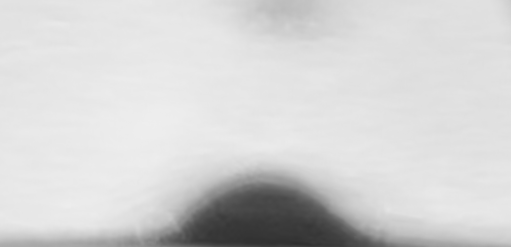

Img shape : 247 511


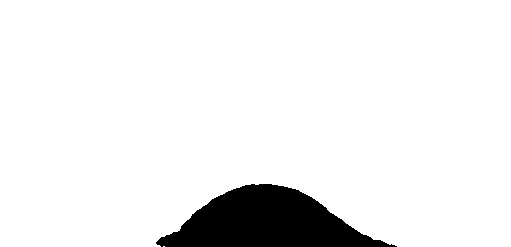

len(c_points_l) : 0
len(c_points_r) : 0


IndexError: ignored

In [146]:
for path in paths:
  print(path)
  start_ur_game_bro(path)